# Omdena  - Milan Chapter Agrifoods
## AI for Sustainable agri-food systems: use of Satellite Imagery
### Data Exploration for grapes_olives in Italy 2006-2019
#### Author: Maria Fisher 


The main objective of this study is to have gather information about crop production in Italy for the period of 2006-2019. 

Crop dataset used in this study was downloaded from the Italian National Institute of Statistics (Istat).



In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import scipy 
import sklearn
import geopandas as gpd
import pgeocode
import folium
import sys
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

In [9]:
grapes = pd.read_csv('grapes-olives_final_2006-2021.csv',skipinitialspace=True)
grapes.head()

City             Type_crop  Year  total_ha  production_tonnes  \
0  Ascoli Piceno  Grapes for table use  2006     33.00             338.20   
1  Ascoli Piceno  Grapes for table use  2006     33.00             338.20   
2  Ascoli Piceno  Grapes for table use  2006     33.00             338.20   
3  Ascoli Piceno  Grapes for table use  2006     33.00             338.20   
4  Ascoli Piceno  Grapes for table use  2007     33.00             317.40   

     PS    TS  QV2M  RH2M  WS2M  ...  T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  \
0 98.73 15.11  8.17 73.57  2.48  ...     7.27      0.63      0.65      51.54   
1 98.73 15.11  8.17 73.57  2.48  ...     7.27      0.63      0.65      51.54   
2 98.73 15.11  8.17 73.57  2.48  ...     7.27      0.63      0.65      51.54   
3 98.73 15.11  8.17 73.57  2.48  ...     7.27      0.63      0.65      51.54   
4 98.64 15.82  7.97 70.75  2.61  ...     8.05      0.55      0.56      51.29   

   T2M_RANGE  PRECTOTCORR       Type_fertilizer  Fertilizers_tonnes   lat  \
0      17.35         1.70  phosphorus-potassium               12.50 42.85   
1      17.35         1.70    nitrogen-potassium               18.70 42.85   
2      17.35         1.70               organic              734.70 42.85   
3      17.35         1.70               organic              535.70 42.85   
4      17.84         1.65  phosphorus-potassium               35.00 42.85   

    lon  
0 13.58  
1 13.58  
2 13.58  
3 13.58  
4 13.58  

[5 rows x 22 columns]

In [10]:
grapes.Type_crop.unique()

array(['Grapes for table use', 'table olives', 'oil olives',
       'grapes for wines with protected designation of origin (pdo)',
       'grapes for wines with protected geographical indication (pgi)',
       'grapes for other wines n.e.c. (without pdo/pgi)', 'other olives',
       'grapes for other purposes n.e.c.', 'grapes for raisins'],
      dtype=object)

In [7]:
#rapes = grapes[grapes["Year"] < 2020]

In [11]:
grapes.Type_crop.unique()

array(['Grapes for table use', 'table olives', 'oil olives',
       'grapes for wines with protected designation of origin (pdo)',
       'grapes for wines with protected geographical indication (pgi)',
       'grapes for other wines n.e.c. (without pdo/pgi)', 'other olives',
       'grapes for other purposes n.e.c.', 'grapes for raisins'],
      dtype=object)

In [12]:
grapes.describe()

Year  total_ha  production_tonnes      PS      TS    QV2M    RH2M  \
count 8368.00   8368.00            8368.00 8368.00 8368.00 8368.00 8368.00   
mean  2017.16   3304.88           20849.20   97.96   15.22    8.03   72.14   
std      4.77   9346.59           57177.53    2.73    2.90    0.91    2.53   
min   2006.00      1.00               0.10   85.07    4.49    5.42   62.43   
25%   2014.00     20.00             160.00   96.67   13.24    7.36   70.50   
50%   2020.00    191.50            1256.00   98.61   15.53    8.01   71.94   
75%   2021.00   2143.50           13178.50   99.70   17.45    8.60   73.85   
max   2021.00  98900.00          721450.00  101.69   20.32   10.60   81.74   

         WS2M  GWETTOP  T2M_MAX  T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  \
count 8368.00  8368.00  8368.00  8368.00   8368.00   8368.00    8368.00   
mean     2.34     0.62    25.58     5.88      0.62      0.63      50.44   
std      0.83     0.08     2.34     3.69      0.07      0.07       6.90   
min      0.56     0.38    16.13    -5.86      0.42      0.42      30.70   
25%      1.67     0.56    24.01     3.22      0.57      0.58      45.49   
50%      2.21     0.62    25.77     5.97      0.62      0.63      50.84   
75%      2.74     0.69    27.07     8.25      0.67      0.68      55.81   
max      4.70     0.89    30.90    14.27      0.80      0.80      74.69   

       T2M_RANGE  PRECTOTCORR  Fertilizers_tonnes     lat     lon  
count    8368.00      8368.00             8368.00 8368.00 8368.00  
mean       19.70         2.04             1291.81   41.89   12.56  
std         3.52         0.59             3998.55    4.62    2.97  
min         9.80         0.80                0.00    0.00    0.00  
25%        17.62         1.59               43.00   40.42   10.40  
50%        20.66         2.01              238.00   42.40   12.66  
75%        22.22         2.38              972.00   44.65   14.73  
max        26.54         4.47            98671.60   46.17   18.17

## Pre-processing dataset 

In [13]:
def show_info(grapes):
    print('DATASET SHAPE: ', grapes.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(grapes.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(grapes.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(grapes.isnull().sum())
show_info(grapes)

DATASET SHAPE:  (8368, 22) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                8368 non-null   object 
 1   Type_crop           8368 non-null   object 
 2   Year                8368 non-null   int64  
 3   total_ha            8368 non-null   float64
 4   production_tonnes   8368 non-null   float64
 5   PS                  8368 non-null   float64
 6   TS                  8368 non-null   float64
 7   QV2M                8368 non-null   float64
 8   RH2M                8368 non-null   float64
 9   WS2M                8368 non-null   float64
 10  GWETTOP             8368 non-null   float64
 11  T2M_MAX             8368 non-null   float64
 12  T2M_MIN             8368 non-null   float64
 13  GWETPROF            8368 non-null   float64
 14  GWET

In [14]:
grapes.describe()

Year  total_ha  production_tonnes      PS      TS    QV2M    RH2M  \
count 8368.00   8368.00            8368.00 8368.00 8368.00 8368.00 8368.00   
mean  2017.16   3304.88           20849.20   97.96   15.22    8.03   72.14   
std      4.77   9346.59           57177.53    2.73    2.90    0.91    2.53   
min   2006.00      1.00               0.10   85.07    4.49    5.42   62.43   
25%   2014.00     20.00             160.00   96.67   13.24    7.36   70.50   
50%   2020.00    191.50            1256.00   98.61   15.53    8.01   71.94   
75%   2021.00   2143.50           13178.50   99.70   17.45    8.60   73.85   
max   2021.00  98900.00          721450.00  101.69   20.32   10.60   81.74   

         WS2M  GWETTOP  T2M_MAX  T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  \
count 8368.00  8368.00  8368.00  8368.00   8368.00   8368.00    8368.00   
mean     2.34     0.62    25.58     5.88      0.62      0.63      50.44   
std      0.83     0.08     2.34     3.69      0.07      0.07       6.90   
min      0.56     0.38    16.13    -5.86      0.42      0.42      30.70   
25%      1.67     0.56    24.01     3.22      0.57      0.58      45.49   
50%      2.21     0.62    25.77     5.97      0.62      0.63      50.84   
75%      2.74     0.69    27.07     8.25      0.67      0.68      55.81   
max      4.70     0.89    30.90    14.27      0.80      0.80      74.69   

       T2M_RANGE  PRECTOTCORR  Fertilizers_tonnes     lat     lon  
count    8368.00      8368.00             8368.00 8368.00 8368.00  
mean       19.70         2.04             1291.81   41.89   12.56  
std         3.52         0.59             3998.55    4.62    2.97  
min         9.80         0.80                0.00    0.00    0.00  
25%        17.62         1.59               43.00   40.42   10.40  
50%        20.66         2.01              238.00   42.40   12.66  
75%        22.22         2.38              972.00   44.65   14.73  
max        26.54         4.47            98671.60   46.17   18.17

## Total grapes production in 2006-2021

In [15]:
plt.figure(figsize= (10,5))
sns.barplot(x= 'Year', y= 'production_tonnes',data = grapes,palette='coolwarm')
plt.title('Total grapes olives production 2006-2019')
plt.xlabel('Year')
plt.ylabel('Total production (tonnes)')
plt.show()



## Cereal production by Cities 

In [16]:
grapes_region = grapes.groupby(by = grapes.City)['production_tonnes','City'].sum().reset_index().sort_values(by = 'production_tonnes', ascending = False).head(10)
grapes_region

City  production_tonnes
88                Taranto        21635688.00
7                    Bari        20513280.00
32                 Foggia        10945200.00
93                Treviso        10121352.80
0               Agrigento         9044038.00
8   Barletta-Andria-Trani         8864800.00
20                Catania         8138128.00
73                 Ragusa         5106000.00
22                 Chieti         4948828.00
15               Brindisi         4688040.00

In [17]:
plt.figure(figsize= (5,5))
sns.barplot(x=grapes_region['production_tonnes'],y= grapes_region['City'], orient='h', palette='coolwarm');
plt.title('Total grapes olives production 2006-2019 by City')
plt.xlabel('Total production')
plt.ylabel('Cities')
plt.show()

## grapes highest production 2006-2021

In [18]:
print(grapes.Type_crop.max())
print(grapes.Type_crop.value_counts())
print(grapes.Type_crop.nunique())



table olives
Grapes for table use                                             4012
grapes for other wines n.e.c. (without pdo/pgi)                   824
oil olives                                                        772
other olives                                                      772
grapes for wines with protected designation of origin (pdo)       760
grapes for wines with protected geographical indication (pgi)     720
table olives                                                      452
grapes for other purposes n.e.c.                                   48
grapes for raisins                                                  8
Name: Type_crop, dtype: int64
9


In [19]:
grapes.Type_crop.unique()


array(['Grapes for table use', 'table olives', 'oil olives',
       'grapes for wines with protected designation of origin (pdo)',
       'grapes for wines with protected geographical indication (pgi)',
       'grapes for other wines n.e.c. (without pdo/pgi)', 'other olives',
       'grapes for other purposes n.e.c.', 'grapes for raisins'],
      dtype=object)

In [20]:
grapes = grapes.replace('Grapes for table use','grapes-table')
grapes = grapes.replace('grapes for other purposes n.e.c.','grapes-n.e.c')
grapes = grapes.replace('grapes for raisins','grapes-raisins')
grapes = grapes.replace('grapes for other wines n.e.c. (without pdo/pgi)','grapes-wines(N-pdo/pgi)')
grapes = grapes.replace('grapes for wines with protected designation of origin (pdo)','grapes-wines(Y-pdo)')
grapes = grapes.replace('grapes for wines with protected geographical indication (pgi)','grapes-wines(Y-pgi)')

In [21]:
print(grapes.total_ha.max())
print(grapes.total_ha.min())
print(grapes.total_ha.value_counts())
print(grapes.total_ha.nunique())


98900.0
1.0
5.00        236
6.00        204
12.00       184
3.00        184
1.00        172
           ... 
10750.00      4
10550.00      4
10500.00      4
16000.00      4
3840.00       4
Name: total_ha, Length: 591, dtype: int64
591


In [22]:
#grapes.drop(grapes[grapes['total_area_ha'] == 0.00 ].index , inplace=True)

In [23]:
grapes.describe().astype(int)

Year  total_ha  production_tonnes    PS    TS  QV2M  RH2M  WS2M  \
count  8368      8368               8368  8368  8368  8368  8368  8368   
mean   2017      3304              20849    97    15     8    72     2   
std       4      9346              57177     2     2     0     2     0   
min    2006         1                  0    85     4     5    62     0   
25%    2014        20                160    96    13     7    70     1   
50%    2020       191               1256    98    15     8    71     2   
75%    2021      2143              13178    99    17     8    73     2   
max    2021     98900             721450   101    20    10    81     4   

       GWETTOP  T2M_MAX  T2M_MIN  GWETPROF  GWETROOT  CLOUD_AMT  T2M_RANGE  \
count     8368     8368     8368      8368      8368       8368       8368   
mean         0       25        5         0         0         50         19   
std          0        2        3         0         0          6          3   
min          0       16       -5         0         0         30          9   
25%          0       24        3         0         0         45         17   
50%          0       25        5         0         0         50         20   
75%          0       27        8         0         0         55         22   
max          0       30       14         0         0         74         26   

       PRECTOTCORR  Fertilizers_tonnes   lat   lon  
count         8368                8368  8368  8368  
mean             2                1291    41    12  
std              0                3998     4     2  
min              0                   0     0     0  
25%              1                  43    40    10  
50%              2                 238    42    12  
75%              2                 972    44    14  
max              4               98671    46    18

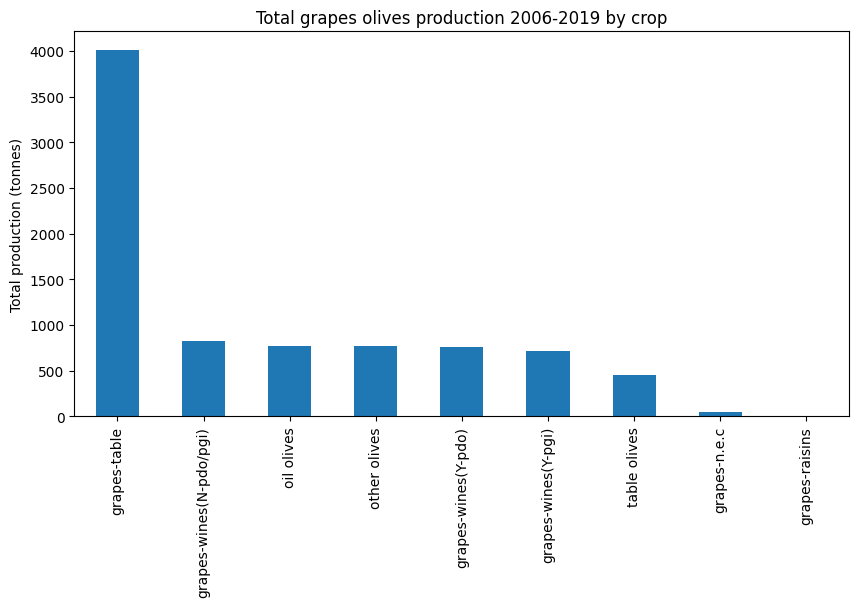

In [24]:
plt.figure(figsize=(10,5))
grapes['Type_crop'].value_counts().plot.bar()
plt.title('Total grapes olives production 2006-2019 by crop')
plt.ylabel('Total production (tonnes)')
plt.show()


In [ ]:
grapes

In [25]:
Q1 = grapes.quantile(0.25)
Q3 = grapes.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                     7.00
total_ha              2123.50
production_tonnes    13018.50
PS                       3.03
TS                       4.21
QV2M                     1.24
RH2M                     3.35
WS2M                     1.07
GWETTOP                  0.13
T2M_MAX                  3.06
T2M_MIN                  5.03
GWETPROF                 0.10
GWETROOT                 0.10
CLOUD_AMT               10.32
T2M_RANGE                4.60
PRECTOTCORR              0.79
Fertilizers_tonnes     929.00
lat                      4.23
lon                      4.33
dtype: float64


In [26]:
# Remove outliers
grapes = grapes[~((grapes < (Q1 - 1.5 * IQR)) | (grapes > (Q3 + 1.5 * IQR))).any(axis=1)]
print(grapes.shape)


(5397, 22)


In [27]:
#Box plot and histplot (crop production distribuition)

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.boxplot(data=grapes, x='production_tonnes', y="Type_crop",  color = 'darkblue', dodge=False)

plt.title(f'Box Plot total grapes production ')

plt.subplot(1,2,2)
sns.histplot(data=grapes, x= 'production_tonnes',  color = 'darkblue', kde=True, bins = 80)
plt.title(f'Distribution total grapes production')

plt.show()



In [28]:
#Box plot and histplot of total area(ha)

plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.boxplot(data=grapes, x='Year', y="total_ha",  color = 'darkblue', dodge=False)

plt.title(f'Box Plot total area (ha)')

plt.subplot(1,2,2)
sns.histplot(data=grapes, x= 'total_ha',  color = 'darkblue', kde=True, bins = 80)
plt.title(f'Distribution total total area (ha)')

plt.show()

In [29]:
print(grapes.production_tonnes.max())
print(grapes.production_tonnes.min())

32400.0
0.1


In [30]:
print(grapes.total_ha.max())
print(grapes.total_ha.min())


5010.0
1.0


In [31]:
print(grapes.Fertilizers_tonnes.max())

2360.0


<AxesSubplot: xlabel='Year', ylabel='Fertilizers_tonnes'>

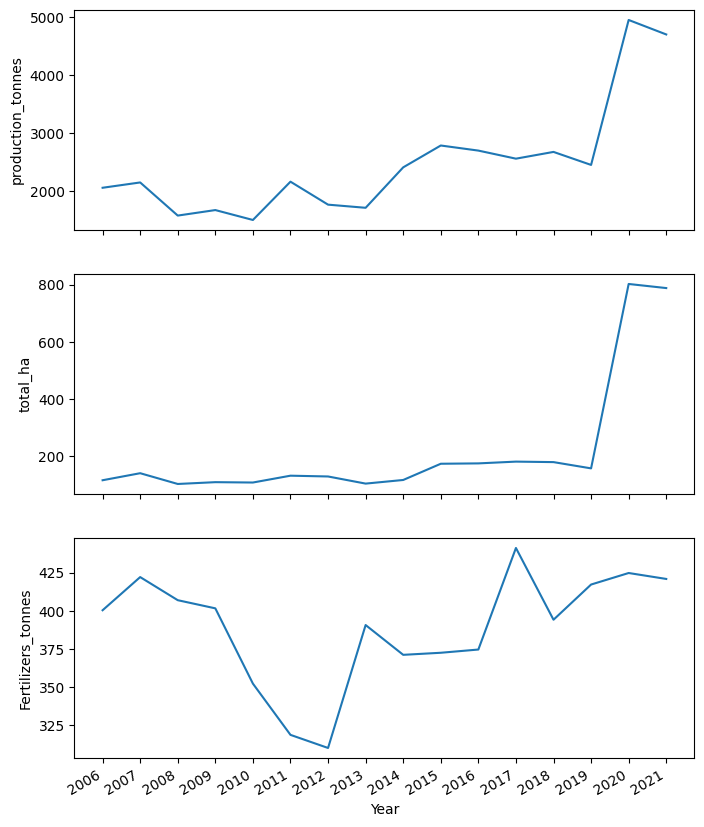

In [32]:
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,11))
fig.autofmt_xdate()

grapes['Year'] = (grapes['Year']).astype(str)

# Total crop production
crops = grapes[['Year', 'production_tonnes']]
crops = crops.groupby('Year').mean()
sns.lineplot(data= crops, x="Year", y="production_tonnes", ax=ax[0])

# Total area
area = grapes[['Year', 'total_ha']]
area = area.groupby('Year').mean()
sns.lineplot(data= area, x="Year", y="total_ha", ax=ax[1])

# Ferlizers
fertilizers = grapes[['Year', 'Fertilizers_tonnes']]
fertilizers = fertilizers.groupby('Year').mean()

sns.lineplot(data= fertilizers, x="Year", y="Fertilizers_tonnes", ax=ax[2])




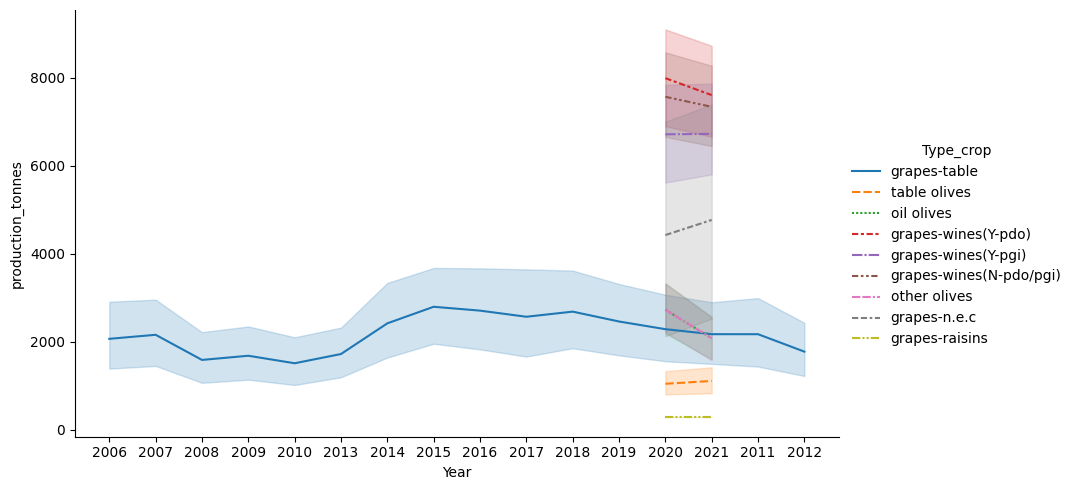

In [33]:
#Crop harvested by year

plotcrop10 = sns.relplot(kind='line', data=grapes, x='Year', 
                         y='production_tonnes', hue='Type_crop', style='Type_crop', aspect=1.75)


In [ ]:
#Fertilizers distributed by year

plotfertilizers10 = sns.relplot(kind='line', data=grapes, x='Year', 
                         y='Fertilizers_tonnes', hue='Type_fertilizer', style='Type_fertilizer', aspect=1.75)

# Climate data analysis

|Param_Code|Param_Name|Resolution|Depth [m]|Units|
|:--------:|:--------:|:--------:|:-------:|:---:|
|GWETPROF|Profile Soil Moisture|0.5° x 0.625°|1.34 - 8.53|water-free [0], saturated soil[1]| 
|GWETTOP|Surface Soil Wetness|0.5° x 0.625°|0.00 - 0.05| water-free [0], saturated soil[1]|
|GWETROOT|Root Zone Soil Wetness|0.5° x 0.625°|0.10 - 1.00|water-free [0], saturated soil[1]|
|CLOUD_AMT|Cloud Amount|---|---|%|
|TS|Earth Skin Temperature|---|---|°C|
|PS|Surface Pressure|---|---|kPa|
|RH2M|Relative Humidity at 2 Meters|---|---|%|
|QV2M|Specific Humidity at 2 Meters|---|---|g/kg|
|PRECTOTCORR|Precipitation Corrected|---|---|mm/day|
|T2M_MAX|Temperature at 2 Meters Maximum|---|---|°C|
|T2M_MIN|Temperature at 2 Meters Minimum|---|---|°C|
|T2M_RANGE|Temperature at 2 Meters Range|---|---|°C|
|WS2M|Wind Speed at 2 Meters|---|---|m/s|


  

*Precipitation Corrected (PRECTOTCORR)- [The bias corrected average of total precipitation at the surface of the earth in water mass (includes water content in snow)]

*Source? https://power.larc.nasa.gov/#resources

In [ ]:

fig, ax = plt.subplots(3, 2, sharex=True, figsize=(20,10))

fig.suptitle('Climate in Italy 2006 - 2021')

grapes['Year'] = (grapes['Year']).astype(str)

# relative_humidity
sns.lineplot(data= grapes, x="Year", y="RH2M", ax=ax[0,0])

# precipitation
sns.lineplot(data= grapes, x="Year", y="PRECTOTCORR", ax=ax[0,1])

# temp_max
sns.lineplot(data= grapes, x="Year", y="T2M_MIN", ax=ax[1,0])

# temp_min
sns.lineplot(data= grapes, x="Year", y="T2M_MAX", ax=ax[1,1])

# surface_soil_wetness
sns.lineplot(data= grapes, x="Year", y="GWETTOP", ax=ax[2,0])

# root_zone_wetness
sns.lineplot(data= grapes, x="Year", y="GWETROOT", ax=ax[2,1])


In [ ]:
grapes

In [ ]:
grapes_model = grapes.drop(columns =['Year','PS','TS','GWETTOP', 'QV2M','WS2M','T2M_RANGE','GWETPROF','CLOUD_AMT','PRECTOTCORR','lat', 'lon'  ])
grapes_model

In [ ]:
grapes_model = grapes_model.to_csv('grapes_model2006-2019.csv', index=False)

# References


http://dati.istat.it

https://maps.princeton.edu/catalog/stanford-mn871sp9778

https://www.crea.gov.it/documents/68457/0/ITACONTA+2020_ENG+DEF+xweb+%281%29.pdf/95c6b30a-1e18-8e94-d4ac-ce884aef76e8?t=1619527317576

https://seaborn.pydata.org/generated/seaborn.relplot.html

https://www.statisticshowto.com/variance-inflation-factor/

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

https://lost-stats.github.io/Presentation/Figures/heatmap_colored_correlation_matrix.html

https://plotly.com/python/box-plots/

https://pycaret.org/